In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [148]:
# graph styles
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'patch.linewidth': 0.5,
    'figure.facecolor': 'white',
    'font.size': 12.0,
    'axes.facecolor': 'white',
    'axes.edgecolor': 'white',
    'axes.linewidth': '1',
    'axes.grid': True,
    'grid.linestyle': 'dotted',
    'grid.color': '#b7b7b7',
    'axes.titlesize': 'x-large',
    'axes.labelsize': 'large',
    'axes.axisbelow': True,
    'axes.prop_cycle': cycler('color', ['#64aad4', '#275876', '#ec866c', '#8bccc9', '#f9d669', '#EBA239']),
    'xtick.major.size': 0,
    'xtick.minor.size': 0,
    'ytick.major.size': 0,
    'ytick.minor.size': 0,
    'axes.labelweight': 'medium',
    'axes.spines.left': False,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.facecolor': '#FFFFFF',
    'font.family': 'Gulim',
})


In [3]:
df = pd.read_csv('data/air-quality-measures.csv')
df.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
0,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1051,Elmore,1999,5.0,No Units,No Units,Monitor Only,1
1,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1073,Jefferson,1999,39.0,No Units,No Units,Monitor Only,1
2,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1079,Lawrence,1999,28.0,No Units,No Units,Monitor Only,1
3,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1089,Madison,1999,31.0,No Units,No Units,Monitor Only,1
4,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1097,Mobile,1999,32.0,No Units,No Units,Monitor Only,1


In [4]:
annual_average = df[df.UnitName=="Micograms per cubic meter"]

In [5]:
annual_average_utah = annual_average[annual_average.StateName=="Utah"]

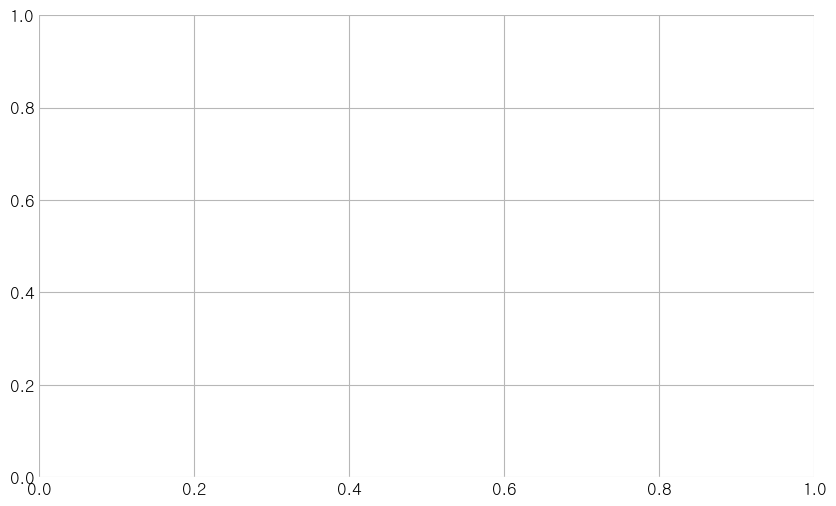

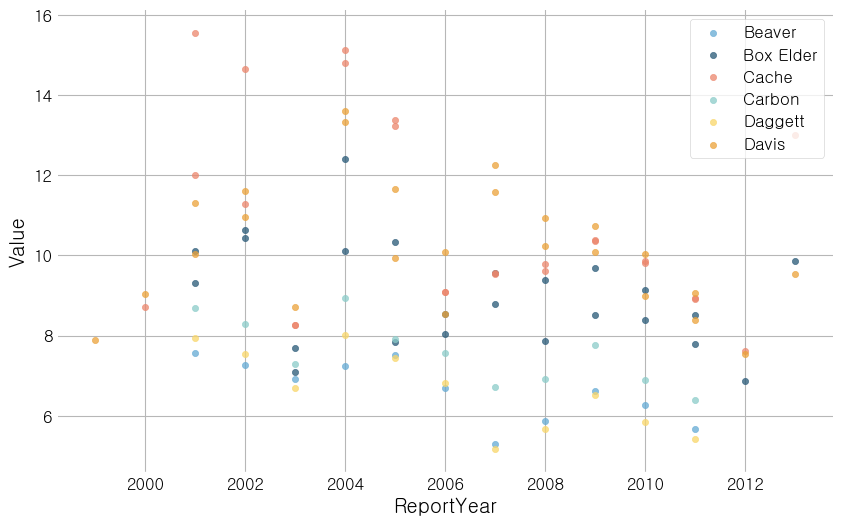

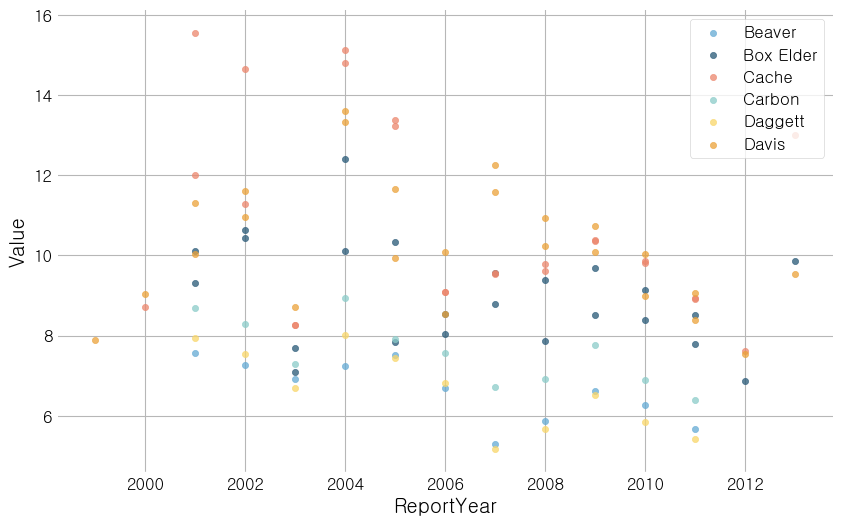

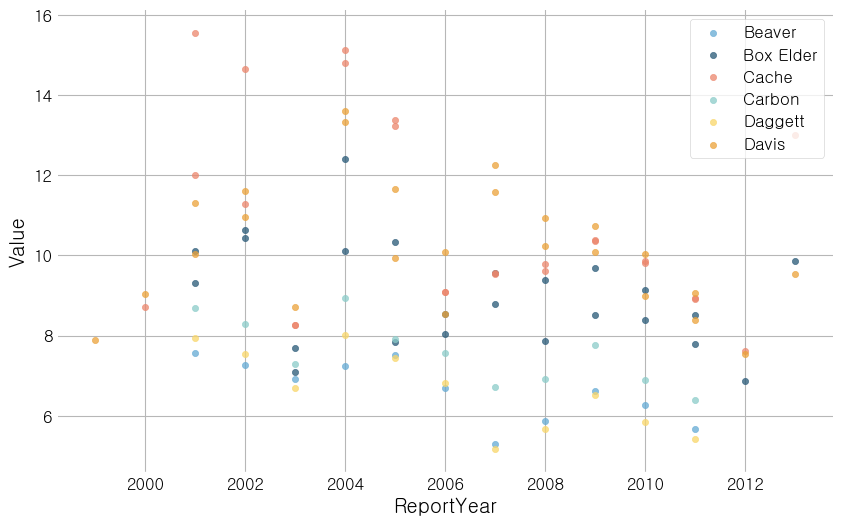

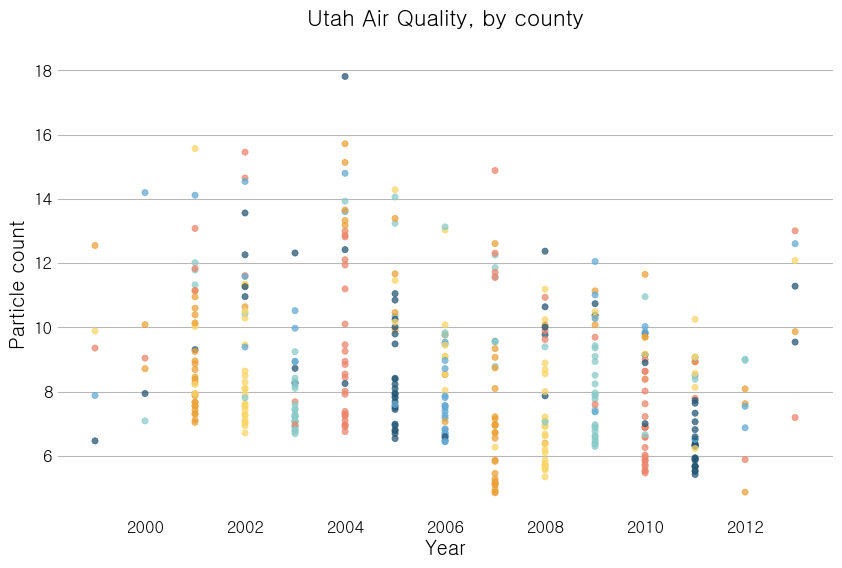

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))

# Don't touch this part of the code!
colors = list(reversed(plt.rcParams['axes.prop_cycle'].by_key()['color']))

groups = annual_average_utah.groupby('CountyName')
for name, group in groups:
    group.plot(kind='scatter', x='ReportYear', y='Value', label=name, ax=ax, alpha=0.75, color=colors)
ax.legend_.remove()

ax.grid(False, axis='x')
ax.set_title("Utah Air Quality, by county", pad=20)
ax.title.set_fontsize(16)
ax.set_xlabel("Year")
ax.set_ylabel("Particle count")

# plt.savefig("graph-scatter.pdf")
plt.show()

## Major Cities

In [59]:
new_york = annual_average[annual_average.StateName=='New York']
nyc = new_york[new_york.CountyName.str.contains("Bronx") | annual_average.CountyName.str.contains("Kings$") | annual_average.CountyName.str.contains("New York")].sort_values(by='ReportYear')
ax = nyc.plot(x='ReportYear', y='Value', kind='scatter')
ax.set_title('New York')
ax.set_ylabel('Particle count')

#plt.show()

/Users/Veronica/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0,0.5,'Particle count')

In [60]:
new_york.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
39281,87,Annual average ambient concentrations of PM2.5...,Average,State x County,36,New York,36119,Westchester,2003,12.146236,µg/m³,Micograms per cubic meter,Monitor Only,1
39361,87,Annual average ambient concentrations of PM2.5...,Average,State x County,36,New York,36061,New York,2004,15.663944,µg/m³,Micograms per cubic meter,Monitor Only,1
39510,87,Annual average ambient concentrations of PM2.5...,Average,State x County,36,New York,36081,Queens,2007,11.411226,µg/m³,Micograms per cubic meter,Monitor Only,1
39557,87,Annual average ambient concentrations of PM2.5...,Average,State x County,36,New York,36005,Bronx,2011,11.614546,µg/m³,Micograms per cubic meter,Monitor Only,1
39582,87,Annual average ambient concentrations of PM2.5...,Average,State x County,36,New York,36085,Richmond,2007,12.969960,µg/m³,Micograms per cubic meter,Monitor Only,1


In [80]:
# Los Angeles readings, chronological
ca = annual_average[annual_average.StateName=='California']
los_angeles = ca[ca.CountyName=='Los Angeles'].sort_values(by='ReportYear')
result = los_angeles
ax = los_angeles.plot(x='ReportYear',y='Value', kind='scatter', figsize=(8,6))
ax.set_title('Los Angeles')
ax.grid(True)

#plt.show()

In [63]:
# Chicago
illinois = annual_average[annual_average.StateName=='Illinois']
chicago = illinois[illinois.CountyName.str.contains("Cook")].sort_values(by='ReportYear')

In [71]:
# Houston
texas = annual_average[annual_average.StateName=='Texas']
houston = texas[texas.CountyName=="Harris"].sort_values(by='ReportYear')
houston.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
39384,87,Annual average ambient concentrations of PM2.5...,Average,State x County,48,Texas,48201,Harris,2000,14.297285,µg/m³,Micograms per cubic meter,Monitor Only,1
42097,87,Annual average ambient concentrations of PM2.5...,Average,State x County,48,Texas,48201,Harris,2001,13.859836,µg/m³,Micograms per cubic meter,Monitor Only,1
212915,296,Annual average ambient concentrations of PM 2....,Average,State x County,48,Texas,48201,Harris,2001,14.959826,µg/m³,Micograms per cubic meter,Monitor Only,1
212916,296,Annual average ambient concentrations of PM 2....,Average,State x County,48,Texas,48201,Harris,2002,14.703965,µg/m³,Micograms per cubic meter,Monitor Only,1
45430,87,Annual average ambient concentrations of PM2.5...,Average,State x County,48,Texas,48201,Harris,2002,14.168014,µg/m³,Micograms per cubic meter,Monitor Only,1


In [72]:
# Philadelphia
penn = annual_average[annual_average.StateName=='Pennsylvania']
phil = penn[penn.CountyName.str.contains("Philadelphia")].sort_values(by='ReportYear')
phil.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
42745,87,Annual average ambient concentrations of PM2.5...,Average,State x County,42,Pennsylvania,42101,Philadelphia,1999,14.641907,µg/m³,Micograms per cubic meter,Monitor Only,1
43957,87,Annual average ambient concentrations of PM2.5...,Average,State x County,42,Pennsylvania,42101,Philadelphia,2000,14.926680,µg/m³,Micograms per cubic meter,Monitor Only,1
40340,87,Annual average ambient concentrations of PM2.5...,Average,State x County,42,Pennsylvania,42101,Philadelphia,2001,16.984667,µg/m³,Micograms per cubic meter,Monitor Only,1
209297,296,Annual average ambient concentrations of PM 2....,Average,State x County,42,Pennsylvania,42101,Philadelphia,2001,17.423393,µg/m³,Micograms per cubic meter,Monitor Only,1
209298,296,Annual average ambient concentrations of PM 2....,Average,State x County,42,Pennsylvania,42101,Philadelphia,2002,15.454521,µg/m³,Micograms per cubic meter,Monitor Only,1


In [73]:
# Phoenix
az = annual_average[annual_average.StateName=='Arizona']
phoenix = az[az.CountyName.str.contains("Maricopa")].sort_values(by='ReportYear')
phoenix.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
43874,87,Annual average ambient concentrations of PM2.5...,Average,State x County,4,Arizona,4013,Maricopa,1999,13.034617,µg/m³,Micograms per cubic meter,Monitor Only,1
40815,87,Annual average ambient concentrations of PM2.5...,Average,State x County,4,Arizona,4013,Maricopa,2000,12.123911,µg/m³,Micograms per cubic meter,Monitor Only,1
185249,296,Annual average ambient concentrations of PM 2....,Average,State x County,4,Arizona,4013,Maricopa,2001,11.668788,µg/m³,Micograms per cubic meter,Monitor Only,1
42003,87,Annual average ambient concentrations of PM2.5...,Average,State x County,4,Arizona,4013,Maricopa,2001,10.915198,µg/m³,Micograms per cubic meter,Monitor Only,1
47424,87,Annual average ambient concentrations of PM2.5...,Average,State x County,4,Arizona,4013,Maricopa,2002,12.571843,µg/m³,Micograms per cubic meter,Monitor Only,1


In [79]:
# San Antonio
texas = annual_average[annual_average.StateName=='Texas']
san_antonio = texas[texas.CountyName=="Bexar"].sort_values(by='ReportYear')
#san_antonio

In [86]:
# San Diego
san_diego = ca[ca.CountyName.str.contains("San Diego")].sort_values(by='ReportYear')
#san_diego

In [ ]:
# Denver
denver = colorado[colorado.CountyName=='Denver'].sort_values(by='ReportYear')
denver.plot(x='ReportYear', y='Value', kind='scatter')

plt.show()

## Ski Resorts

In [58]:
# Vail and Beaver Creek, CO - chronological
eagle = annual_average[annual_average.CountyName=='Eagle'].sort_values(by='ReportYear')
ax = eagle.plot(x='ReportYear', y='Value', kind='scatter')
ax.set_title('Vail and Beaver Creek')
ax.set_ylabel('Particle count')

#plt.show()

Text(0,0.5,'Particle count')

In [57]:
# Summit County
colorado = annual_average[annual_average.StateName=='Colorado']
summit = colorado[colorado.CountyName=='Summit'].sort_values(by='ReportYear')
summit.plot(x='ReportYear', y='Value', kind='scatter')

#plt.show()

In [88]:
# Mammoth
mammoth = ca[ca.CountyName.str.contains("Mono")].sort_values(by='ReportYear')
#mammoth

In [92]:
# Steamboat
steamboat = colorado[colorado.CountyName.str.contains("Routt")].sort_values(by='ReportYear')
#steamboat

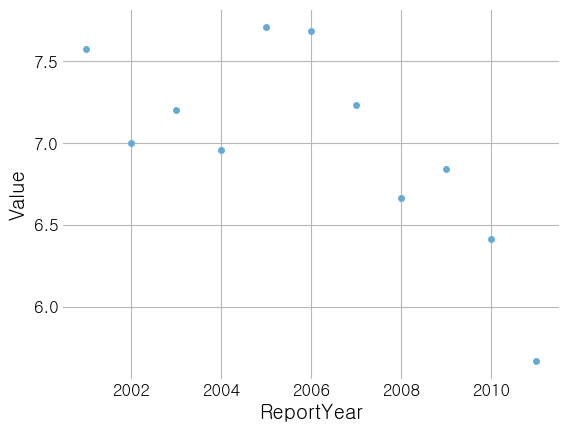

In [126]:
montana = annual_average[annual_average.StateName=='Montana']
big_sky = montana[montana.CountyName=='Madison']
big_sky.plot(x='ReportYear', y='Value', kind='scatter')

plt.show()

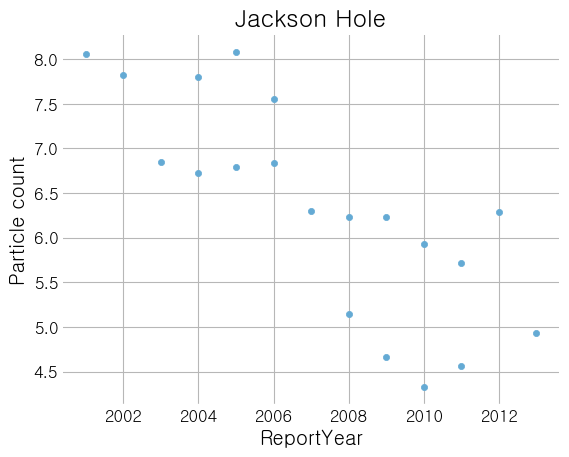

In [25]:
wyoming = annual_average[annual_average.StateName=='Wyoming']
jackson = wyoming[wyoming.CountyName=='Teton']
ax = jackson.plot(x='ReportYear', y='Value', kind='scatter')
ax.set_title('Jackson Hole')
ax.set_ylabel('Particle count')

plt.show()

## National Parks and such

In [97]:
# Great Smoky Mountains
great_smoky = annual_average[annual_average.CountyName.str.contains("Blount") | annual_average.CountyName.str.contains("Sevier") | annual_average.CountyName.str.contains("Cocke") | annual_average.CountyName.str.contains("Swain") | annual_average.CountyName.str.contains("Haywood")].sort_values(by='ReportYear')
great_smoky

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
47516,87,Annual average ambient concentrations of PM2.5...,Average,State x County,37,North Carolina,37087,Haywood,1999,15.770472,µg/m³,Micograms per cubic meter,Monitor Only,1
45892,87,Annual average ambient concentrations of PM2.5...,Average,State x County,37,North Carolina,37173,Swain,1999,14.496616,µg/m³,Micograms per cubic meter,Monitor Only,1
45288,87,Annual average ambient concentrations of PM2.5...,Average,State x County,47,Tennessee,47009,Blount,1999,17.398522,µg/m³,Micograms per cubic meter,Monitor Only,1
40225,87,Annual average ambient concentrations of PM2.5...,Average,State x County,37,North Carolina,37087,Haywood,2000,15.510982,µg/m³,Micograms per cubic meter,Monitor Only,1
39396,87,Annual average ambient concentrations of PM2.5...,Average,State x County,37,North Carolina,37173,Swain,2000,14.066425,µg/m³,Micograms per cubic meter,Monitor Only,1
210815,296,Annual average ambient concentrations of PM 2....,Average,State x County,47,Tennessee,47009,Blount,2001,17.278669,µg/m³,Micograms per cubic meter,Monitor Only,1
184479,296,Annual average ambient concentrations of PM 2....,Average,State x County,1,Alabama,1009,Blount,2001,16.032861,µg/m³,Micograms per cubic meter,Monitor & Modeled,0
205799,296,Annual average ambient concentrations of PM 2....,Average,State x County,37,North Carolina,37173,Swain,2001,12.812040,µg/m³,Micograms per cubic meter,Monitor Only,1
41946,87,Annual average ambient concentrations of PM2.5...,Average,State x County,37,North Carolina,37087,Haywood,2001,14.851348,µg/m³,Micograms per cubic meter,Monitor Only,1
39764,87,Annual average ambient concentrations of PM2.5...,Average,State x County,47,Tennessee,47009,Blount,2001,14.970052,µg/m³,Micograms per cubic meter,Monitor Only,1


In [102]:
# Grand Canyon
grand_canyon = az[az.CountyName=="Coconino"].sort_values(by='ReportYear')
#grand_canyon

In [104]:
# Zion
utah = annual_average[annual_average.StateName=='Utah']
zion = utah[utah.CountyName.str.contains("Washington") | utah.CountyName.str.contains("Kane") | utah.CountyName.str.contains("Iron")].sort_values(by='ReportYear')
#zion

In [109]:
# Rocky Mountain
rocky_mtn = colorado[colorado.CountyName=="Grand"].sort_values(by='ReportYear')
#rocky_mtn

In [110]:
# Yosemite
yosemite = ca[ca.CountyName=="Tuolumne"].sort_values(by='ReportYear')
#yosemite

In [ ]:
# Yellowstone

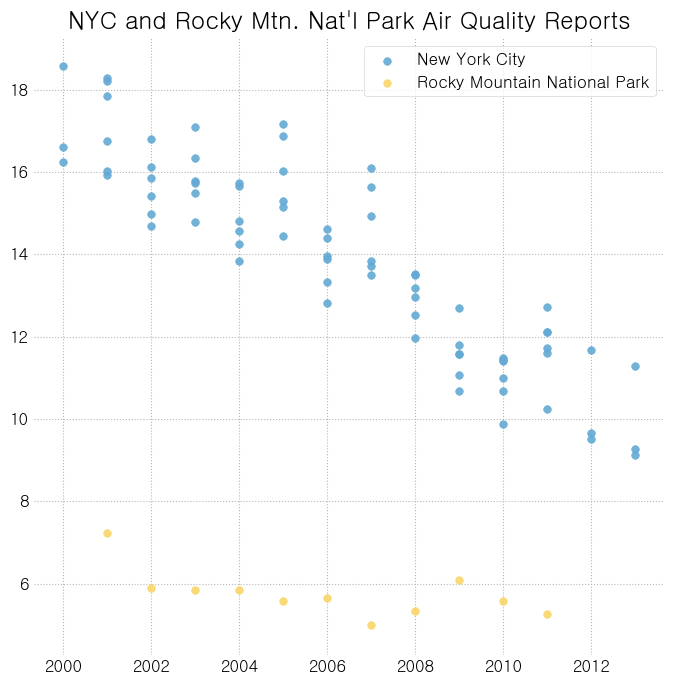

In [152]:
# One subplot again
fig, ax = plt.subplots(figsize=(7,7))

# Use ax for both
#denver.plot(x='ReportYear', y='Value', ax=ax, label='Denver', kind='scatter', color='#64aad4', s=30, alpha=.75)
nyc.plot(x='ReportYear', y='Value', ax=ax, label='New York City', kind='scatter', color='#64aad4', s=30, alpha=.9)
#chicago.plot(x='ReportYear', y='Value', ax=ax, label='Chicago', kind='scatter', color='#275876', s=30, alpha=.75)
eagle.plot(x='ReportYear', y='Value', ax=ax, label='Rocky Mountain National Park', kind='scatter', color='#f9d669', s=30, alpha=.9)

ax.set_title("NYC and Rocky Mtn. Nat'l Park Air Quality Reports")
ax.set_ylabel('')
ax.set_xlabel('')
ax.grid(linestyle='dotted')


plt.tight_layout()

plt.savefig("nyc-vs-rocky-mtn.pdf")
plt.show()

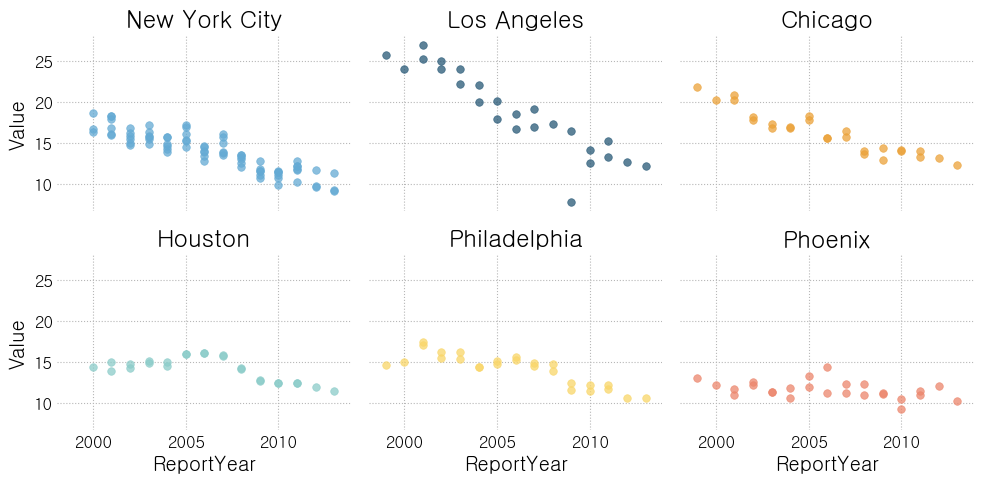

In [155]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(10,5))

# Doing each of these manually (ugh)
nyc.plot(x='ReportYear', y='Value', kind='scatter', color='#64aad4', s=30, alpha=.75, ax=ax1)
ax1.set_title("New York City")
los_angeles.plot(x='ReportYear', y='Value', kind='scatter', color='#275876', s=30, alpha=.75, ax=ax2)
ax2.set_title("Los Angeles")
chicago.plot(x='ReportYear', y='Value', kind='scatter', color='#EBA239', s=30, alpha=.75, ax=ax3)
ax3.set_title("Chicago")
houston.plot(x='ReportYear', y='Value', kind='scatter', color='#8bccc9', s=30, alpha=.75, ax=ax4)
ax4.set_title("Houston")
phil.plot(x='ReportYear', y='Value', kind='scatter', color='#f9d669', s=30, alpha=.75, ax=ax5)
ax5.set_title("Philadelphia")
phoenix.plot(x='ReportYear', y='Value', kind='scatter', color='#ec866c', s=30, alpha=.75, ax=ax6)
ax6.set_title("Phoenix")

ax.set_ylabel('')
ax.set_xlabel('')

# If you don't do tight_layout() you'll have weird overlaps
plt.tight_layout()
plt.savefig("major-cities-air-quality.pdf")
plt.show()

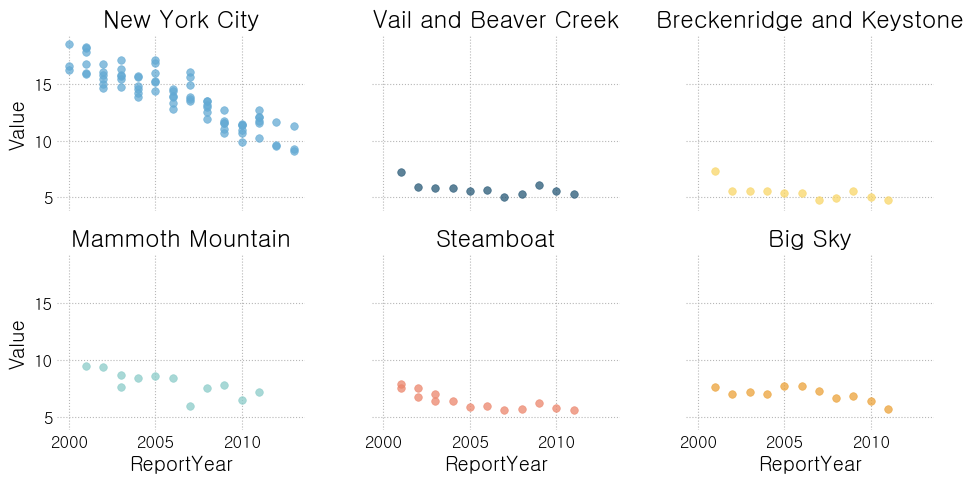

In [154]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(10,5))

# Doing each of these manually (ugh)
nyc.plot(x='ReportYear', y='Value', kind='scatter', color='#64aad4', s=30, alpha=.75, ax=ax1)
ax1.set_title("New York City")
eagle.plot(x='ReportYear', y='Value', kind='scatter', color='#275876', s=30, alpha=.75, ax=ax2)
ax2.set_title("Vail and Beaver Creek")
summit.plot(x='ReportYear', y='Value', kind='scatter', color='#f9d669', s=30, alpha=.75, ax=ax3)
ax3.set_title("Breckenridge and Keystone")
mammoth.plot(x='ReportYear', y='Value', kind='scatter', color='#8bccc9', s=30, alpha=.75, ax=ax4)
ax4.set_title("Mammoth Mountain")
steamboat.plot(x='ReportYear', y='Value', kind='scatter', color='#ec866c', s=30, alpha=.75, ax=ax5)
ax5.set_title("Steamboat")
big_sky.plot(x='ReportYear', y='Value', kind='scatter', color='#EBA239', s=30, alpha=.75, ax=ax6)
ax6.set_title("Big Sky")

ax.set_ylabel('')
ax.set_xlabel('')

# If you don't do tight_layout() you'll have weird overlaps
plt.tight_layout()
plt.savefig("ski-resorts-air-quality.pdf")
plt.show()

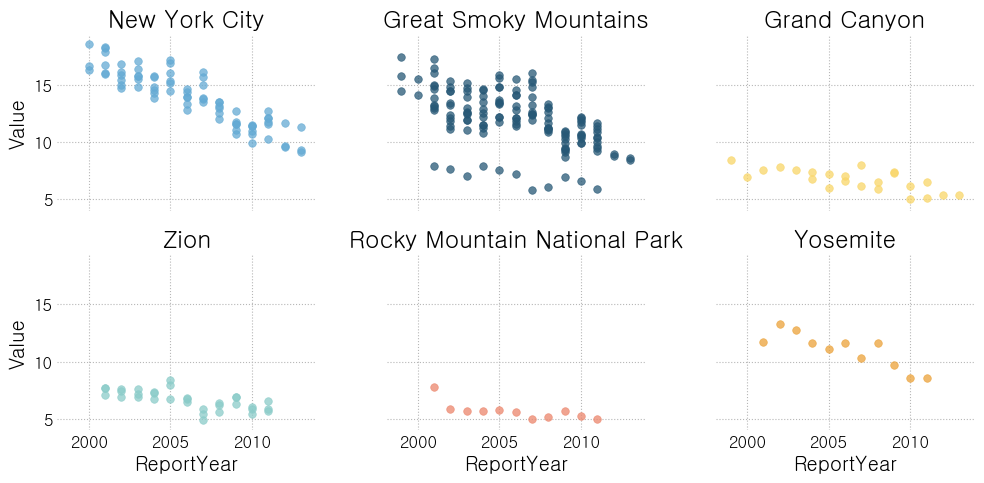

In [153]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(10,5))

# Doing each of these manually (ugh)
nyc.plot(x='ReportYear', y='Value', kind='scatter', color='#64aad4', s=30, alpha=.75, ax=ax1)
ax1.set_title("New York City")
great_smoky.plot(x='ReportYear', y='Value', kind='scatter', color='#275876', s=30, alpha=.75, ax=ax2)
ax2.set_title("Great Smoky Mountains")
grand_canyon.plot(x='ReportYear', y='Value', kind='scatter', color='#f9d669', s=30, alpha=.75, ax=ax3)
ax3.set_title("Grand Canyon")
zion.plot(x='ReportYear', y='Value', kind='scatter', color='#8bccc9', s=30, alpha=.75, ax=ax4)
ax4.set_title("Zion")
rocky_mtn.plot(x='ReportYear', y='Value', kind='scatter', color='#ec866c', s=30, alpha=.75, ax=ax5)
ax5.set_title("Rocky Mountain National Park")
yosemite.plot(x='ReportYear', y='Value', kind='scatter', color='#EBA239', s=30, alpha=.75, ax=ax6)
ax6.set_title("Yosemite")

ax.set_ylabel('')
ax.set_xlabel('')

# If you don't do tight_layout() you'll have weird overlaps
plt.tight_layout()
plt.savefig("natl-parks-air-quality.pdf")
plt.show()